In [49]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pmdarima as pm
import numpy as np
from pmdarima.arima import ndiffs
from plotly.subplots import make_subplots
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
sales = pd.read_csv('/content/drive/MyDrive/korn.alpaco/Project - 파이썬2/2조/파이썬 개발/sales_rate.csv')

In [52]:
sales

,주문일시,10/15 실링용기 3-5 블랙,10/25 죽용기 뚜껑 1 box,"10/31 250,270 직화용기",105파이 다용도컵 5호 뚜껑,105파이 다용도컵 5호(대) 블랙 용기만,"105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)","105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스)","105파이 다용도컵 세트 5호 대 370ml 투명 PS 1,000개 1set(2박스)","105파이 다용도컵 세트 5호 소 250ml 백색 PS 1,000개 1set(2박스)",...,토마토 180 340개(1BOX),포기김치용기 투명 100개 1set(2박스/6.5L),호프 빗살 용기 1000 132개 (1BOX),호프 빗살 용기 1500 105개 (1BOX),회접시 붕어 대 100개 1박스,회접시 붕어 소 250개 1박스,회접시 타원 330 민자 소 300개 1박스,회접시 타원 330 볼록 소 300개 1박스,회접시 타원 380 민자 대 200개 1박스,회접시 타원 380 볼록 대 200개 1박스
0,2017-01-01,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-02-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2019-05-30,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
761,2019-05-31,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
762,2019-06-02,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
763,2019-06-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
sales['주문일시'] = pd.to_datetime(sales['주문일시'], format='%Y-%m-%d')

1. PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)


In [56]:
sales_1 = sales[['주문일시', 'PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)']]

In [57]:
sales_1

,주문일시,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)
0,2017-01-01,0
1,2017-01-15,0
2,2017-01-18,0
3,2017-01-23,0
4,2017-02-02,0
...,...,...
760,2019-05-30,4
761,2019-05-31,3
762,2019-06-02,0
763,2019-06-04,0


In [58]:
sales_1 = sales_1[260:762]

In [59]:
sales_1 = sales_1.set_index(keys=['주문일시'], inplace=False, drop=True)

In [60]:
sales_1

,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)
주문일시,
2018-01-11,0
2018-01-12,0
2018-01-13,0
2018-01-14,0
2018-01-15,3
...,...
2019-05-27,5
2019-05-28,7
2019-05-29,6


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49884 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

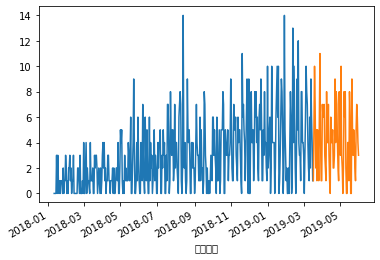

In [61]:
y_train = sales_1['PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)'][:int(0.85*len(sales_1))]
y_test = sales_1['PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기)'][int(0.85*len(sales_1)):]
y_train.plot()
y_test.plot()

In [62]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f'추정된 차수 d = {n_diffs}')

추정된 차수 d = 1


In [63]:
model = pm.auto_arima(y= y_train, d=1, start_p=1, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2161.590, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2211.001, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.001, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2130.782, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2106.400, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=2104.417, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2128.787, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1975.419, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1984.167, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1966.615, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1994.054, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=1972.2

In [64]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1
        , return_conf_int=True)              
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [65]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [66]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
주문일시,,
2019-03-17,1,3.049800
2019-03-18,5,5.280574
2019-03-19,10,7.079033
2019-03-20,7,7.123188
2019-03-21,2,4.995681
...,...,...
2019-05-27,5,3.483179
2019-05-28,7,5.480724
2019-05-29,6,6.293862


In [67]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1113.574
Date:                Fri, 02 Dec 2022   AIC                           2239.149
Time:                        13:48:27   BIC                           2264.448
Sample:                             0   HQIC                          2249.075
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2464      0.005    232.148      0.000       1.236       1.257
ar.L2         -0.9940      0.006   -167.182      0.000      -1.006      -0.982
ma.L1         -2.2136      0.024    -90.575      0.0

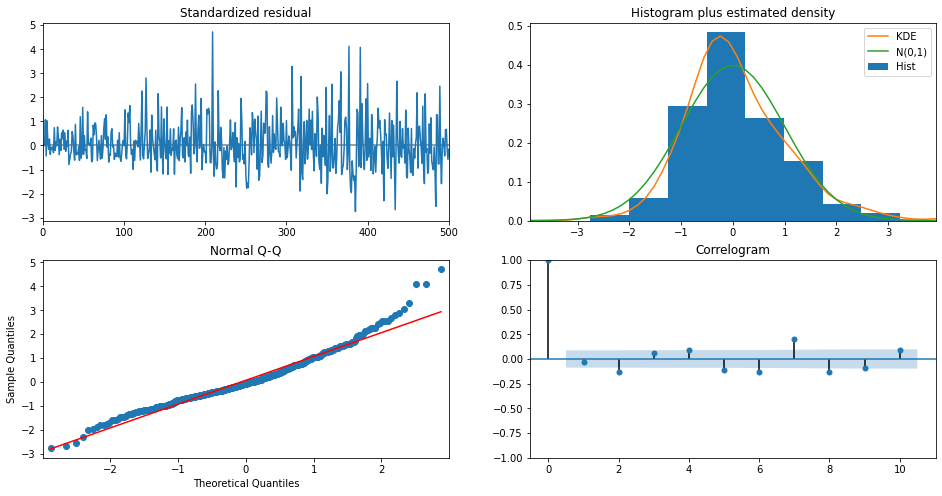

In [68]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [69]:

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1]
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA모형(PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))")
fig.show()

2.  210파이 중화면용기 소 300개 1박스

In [78]:
sales_2 = sales[['주문일시', '210파이 중화면용기 소 300개 1박스']]

In [79]:
sales_2

,주문일시,210파이 중화면용기 소 300개 1박스
0,2017-01-01,0
1,2017-01-15,0
2,2017-01-18,0
3,2017-01-23,0
4,2017-02-02,0
...,...,...
760,2019-05-30,13
761,2019-05-31,6
762,2019-06-02,1
763,2019-06-04,0


In [80]:
sales_2 = sales_2[580:762]

In [81]:
sales_2 = sales_2.set_index(keys=['주문일시'], inplace=False, drop=True)

In [82]:
sales_2

,210파이 중화면용기 소 300개 1박스
주문일시,
2018-12-01,0
2018-12-02,0
2018-12-03,1
2018-12-04,10
2018-12-05,5
...,...
2019-05-27,12
2019-05-28,15
2019-05-29,13


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49884 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

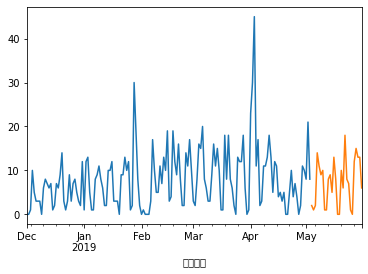

In [83]:
y_train = sales_2['210파이 중화면용기 소 300개 1박스'][:int(0.85*len(sales_2))]
y_test = sales_2['210파이 중화면용기 소 300개 1박스'][int(0.85*len(sales_2)):]
y_train.plot()
y_test.plot()

In [84]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f'추정된 차수 d = {n_diffs}')

추정된 차수 d = 1


In [85]:
model = pm.auto_arima(y= y_train, d=1, start_p=1, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1044.347, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1051.836, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1049.844, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1043.223, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1036.766, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1034.801, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1041.251, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=998.856, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1002.995, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1001.568, Time=0.31 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total f

In [86]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1
        , return_conf_int=True)              
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [87]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [88]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
주문일시,,
2019-05-04,2,7.792817
2019-05-05,1,3.031079
2019-05-06,2,5.490542
2019-05-07,14,6.950277
2019-05-08,11,12.024083
2019-05-09,9,10.011610
2019-05-10,10,6.787087
2019-05-11,1,8.095178
2019-05-12,1,4.740401


In [89]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -578.932
Date:                Fri, 02 Dec 2022   AIC                           1167.864
Time:                        13:55:13   BIC                           1183.857
Sample:                             0   HQIC                          1174.348
                                - 182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3564      0.069      5.157      0.000       0.221       0.492
ar.L2         -0.0577      0.065     -0.885      0.376      -0.185       0.070
ar.L3         -0.2266      0.071     -3.189      0.0

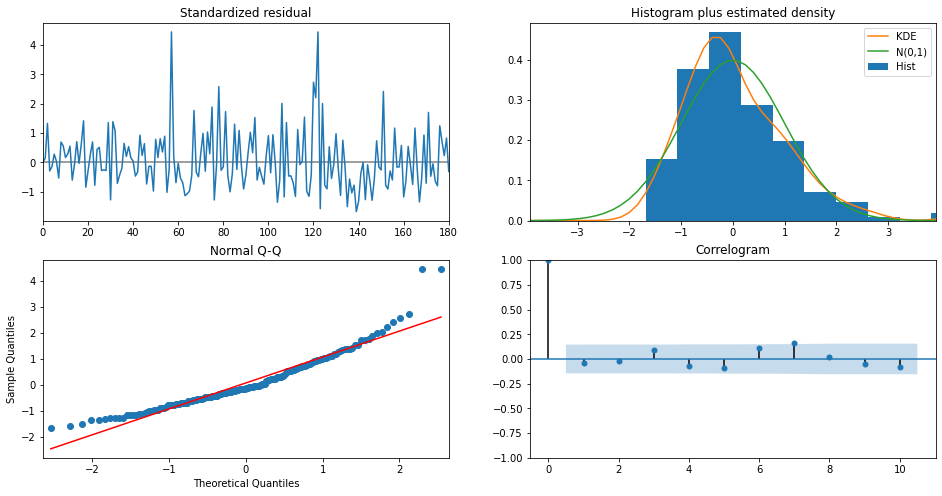

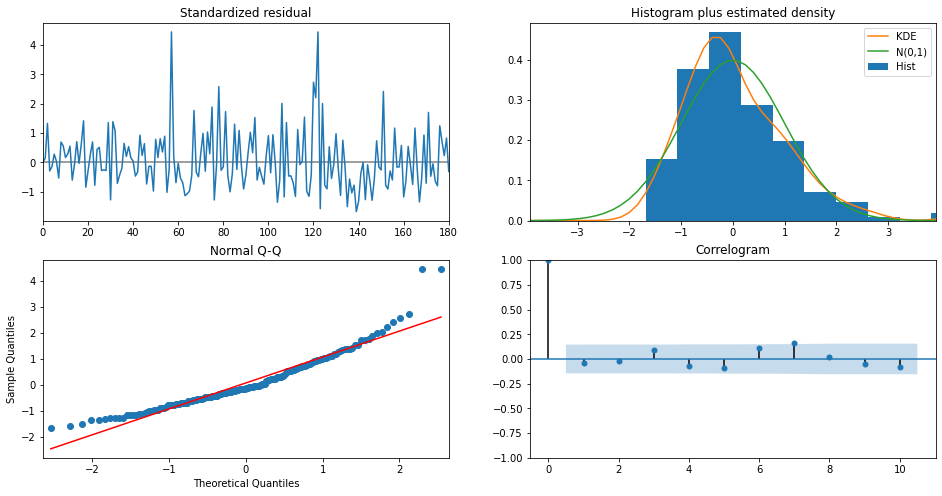

In [91]:
model.plot_diagnostics(figsize=(16, 8))

In [93]:

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1]
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA모형(210파이 중화면용기 소 300개 1박스))")
fig.show()

3. 195파이 탕용기 소 300개 1set(2박스)

In [94]:
sales_3 = sales[['주문일시', '195파이 탕용기 소 300개 1set(2박스)']]

In [95]:
sales_3

,주문일시,195파이 탕용기 소 300개 1set(2박스)
0,2017-01-01,0
1,2017-01-15,0
2,2017-01-18,0
3,2017-01-23,0
4,2017-02-02,0
...,...,...
760,2019-05-30,7
761,2019-05-31,2
762,2019-06-02,0
763,2019-06-04,0


In [96]:
sales_3 = sales_3[330:762]

In [97]:
sales_3 = sales_3.set_index(keys=['주문일시'], inplace=False, drop=True)

In [98]:
sales_3

,195파이 탕용기 소 300개 1set(2박스)
주문일시,
2018-03-26,0
2018-03-27,0
2018-03-28,0
2018-03-29,0
2018-03-30,0
...,...
2019-05-27,8
2019-05-28,9
2019-05-29,8


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49884 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

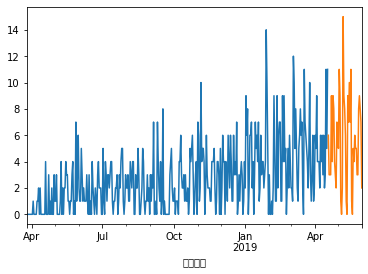

In [99]:
y_train = sales_3['195파이 탕용기 소 300개 1set(2박스)'][:int(0.9*len(sales_3))]
y_test = sales_3['195파이 탕용기 소 300개 1set(2박스)'][int(0.9*len(sales_3)):]
y_train.plot()
y_test.plot()

In [100]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f'추정된 차수 d = {n_diffs}')

추정된 차수 d = 1


In [101]:
model = pm.auto_arima(y= y_train, d=1, start_p=1, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1877.358, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.134, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.170, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1840.809, Time=0.12 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1822.482, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1820.633, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1838.920, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1736.789, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1736.354, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1737.372, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1739.561, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1875.4

In [102]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1
        , return_conf_int=True)              
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [103]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [104]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
주문일시,,
2019-04-18,6,5.805356
2019-04-19,3,4.598101
2019-04-20,3,4.572645
2019-04-21,3,4.788440
2019-04-22,9,4.705494
2019-04-23,4,5.709955
2019-04-24,9,4.383098
2019-04-25,8,5.697672
2019-04-26,4,5.246129


In [105]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -987.216
Date:                Fri, 02 Dec 2022   AIC                           1982.432
Time:                        14:27:01   BIC                           1998.697
Sample:                             0   HQIC                          1988.854
                                - 432                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1646      0.048      3.440      0.001       0.071       0.258
ar.L2         -0.1251      0.042     -2.968      0.003      -0.208      -0.043
ma.L1         -0.9586      0.015    -64.075      0.0

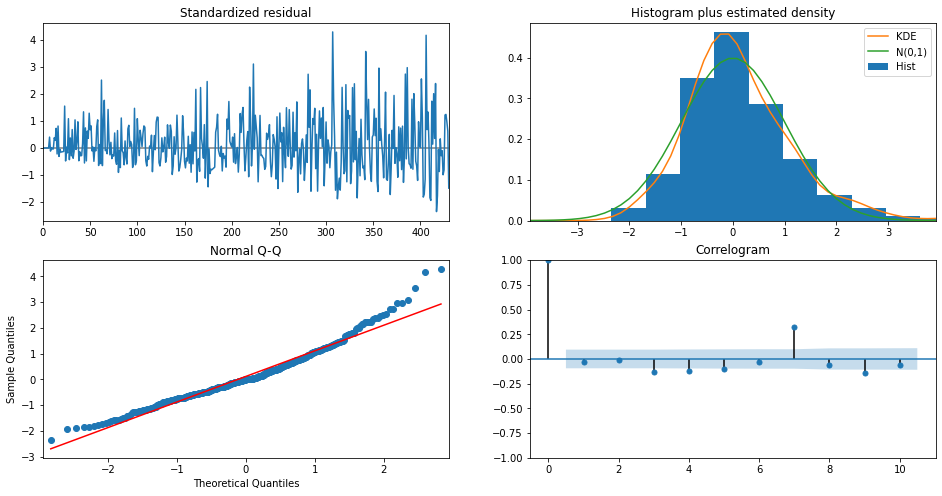

In [106]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

In [107]:

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1]
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA모형(195파이 탕용기 소 300개 1set(2박스))")
fig.show()

4. 210파이 중화면용기 중 300개 1박스

In [114]:
sales_4 = sales[['주문일시', '210파이 중화면용기 중 300개 1박스']]

In [115]:
sales_4

,주문일시,210파이 중화면용기 중 300개 1박스
0,2017-01-01,0
1,2017-01-15,0
2,2017-01-18,0
3,2017-01-23,0
4,2017-02-02,0
...,...,...
760,2019-05-30,11
761,2019-05-31,4
762,2019-06-02,1
763,2019-06-04,0


In [116]:
sales_4 = sales_4[580:762]

In [117]:
sales_4 = sales_4.set_index(keys=['주문일시'], inplace=False, drop=True)

In [118]:
sales_4

,210파이 중화면용기 중 300개 1박스
주문일시,
2018-12-01,0
2018-12-02,0
2018-12-03,1
2018-12-04,2
2018-12-05,5
...,...
2019-05-27,11
2019-05-28,12
2019-05-29,10


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49884 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51452 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47928 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51068 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

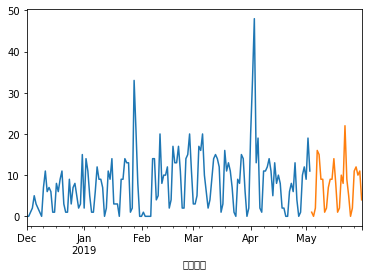

In [120]:
y_train = sales_4['210파이 중화면용기 중 300개 1박스'][:int(0.85*len(sales_4))]
y_test = sales_4['210파이 중화면용기 중 300개 1박스'][int(0.85*len(sales_4)):]
y_train.plot()
y_test.plot()

In [121]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f'추정된 차수 d = {n_diffs}')

추정된 차수 d = 1


In [122]:
model = pm.auto_arima(y= y_train, d=1, start_p=1, max_p=3, start_q=0, max_q=3, m=1, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1047.090, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1048.662, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1037.408, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1046.676, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1036.547, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1006.909, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1045.114, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1003.996, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1042.978, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1000.907, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1035.981, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1002.2

In [123]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1
        , return_conf_int=True)              
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [124]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [125]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
주문일시,,
2019-05-04,1,8.725585
2019-05-05,0,2.503056
2019-05-06,2,4.463272
2019-05-07,16,7.234352
2019-05-08,15,14.369093
2019-05-09,9,11.936349
2019-05-10,9,6.321787
2019-05-11,1,7.379737
2019-05-12,2,4.424515


In [126]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  182
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -579.636
Date:                Fri, 02 Dec 2022   AIC                           1169.272
Time:                        14:29:29   BIC                           1185.264
Sample:                             0   HQIC                          1175.756
                                - 182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4519      0.063      7.191      0.000       0.329       0.575
ar.L2         -0.1100      0.061     -1.793      0.073      -0.230       0.010
ar.L3         -0.2208      0.077     -2.881      0.0

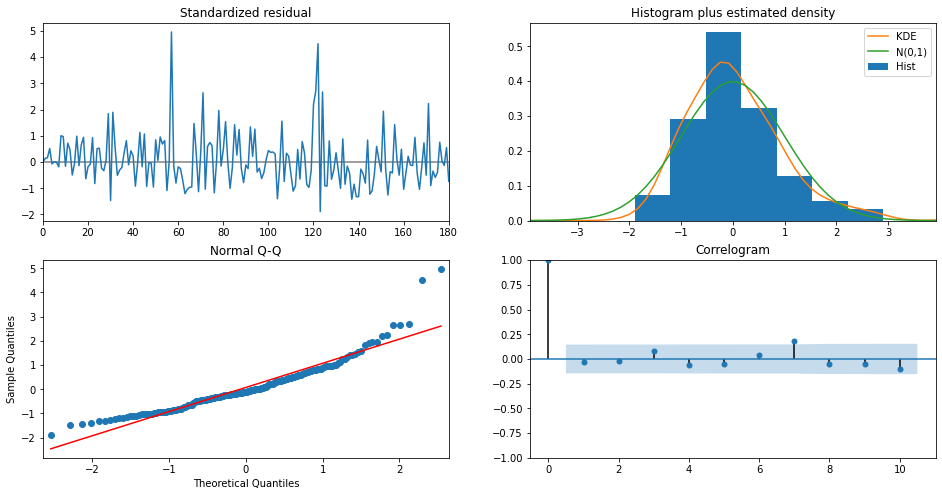

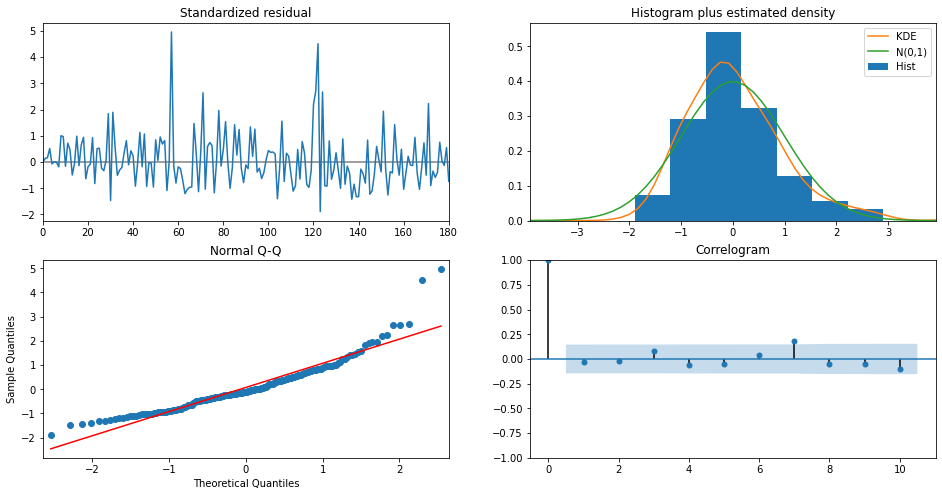

In [127]:
model.plot_diagnostics(figsize=(16, 8))

In [128]:

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1]
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA모형(210파이 중화면용기 중 300개 1박스)")
fig.show()